# Assignment 2 Machine Learning

NIM              : 2602063913

NAME             : Bernardus Ignasio

CLASS            : LA01

Assignment Number: 2

## No 1

In [62]:
import pandas as pd
import numpy as np
from csv import reader
from math import sqrt
import math

In [81]:
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

### Standarizing Data

Data is standarized to make the value has same scale based on their mean and standard deviation. This method is used because it has better performa

In [90]:
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())
        
def column_means(dataset):
    means = [0 for i in range(len(dataset[0]))]
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        means[i] = sum(col_values) / float(len(dataset))
    return means

def column_stdev(dataset,means):
    stdevs=[0 for i in range(len(dataset[0]))]
    for i in range(len(dataset[0])):
        variance=[pow(row[i]-means[i],2) for row in dataset]
        stdevs[i]=sum(variance)
    stdev=[sqrt(x/(float(len(dataset)-1))) for x in stdevs]
    return stdev

def standardize_dataset(dataset,means,stdevs):
    for row in dataset:
        for i in range(len(row)):
            row[i]=(row[i]-means[i])/stdevs[i]

filename='home.txt'
dataset=load_csv(filename)
            
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
    
means=column_means(dataset)
stdevs=column_stdev(dataset,means)

standardize_dataset(dataset,means,stdevs)
print(dataset[0])

[0.13000986907454054, -0.2236751871685913, 0.47574686657859083]


### Fitting into training & test set

In [91]:
x=[row[:-1] for row in dataset]
y=[row[-1] for row in dataset]

In [92]:
index=list(np.arange(len(dataset)))
np.random.shuffle(index)
split=int(0.8*len(dataset))

x=np.array(x)
y=np.array(y)

x_train,x_test=x[index[:split]], x[index[split:]]
y_train,y_test=y[index[:split]], y[index[split:]]

### Predicting the training & test result

In [93]:
class MLR:
    def __init__(self):
        self.coeff_=None
        self.intercept_=None
    
    def fit(self,x,y):
        x=np.insert(x,0,1,axis=1)
        betas=np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
        self.intercept_=betas[0]
        self.coeff_=betas[1:]
        
    def predict(self,x):
        y_pred=np.dot(x,self.coeff_)+ self.intercept_
        return y_pred

In [94]:
mlr=MLR()
mlr.fit(x_train,y_train)
mlr.coeff_,mlr.intercept_

(array([ 0.9068845 , -0.10135699]), -0.01404181980368411)

In [95]:
y_pred=mlr.predict(x_test)
print(y_test)
print(y_pred)

[-0.08328269  1.86730269  0.87561923 -0.88381916 -1.12374258 -0.80704367
 -0.77985235  1.27627534 -0.72387022 -0.78305133]
[-0.11767561  2.16464933  0.21700862 -0.86057238 -0.86399586 -0.90165422
 -0.44404807  0.56962782 -1.01919396 -0.56957595]


### Evaluation Metrics

In [96]:
def mea(pred,test):
    n=len(pred)
    sum=0
    for i in range(n):
        sum+=abs(test[i]-pred[i])
    error=sum/n
    return error

def rmse(pred,test):
    mse=np.square(np.subtract(y_test,y_pred)).mean()
    rmse=math.sqrt(mse)
    return rmse

def r2(pred,test):
    corr_matrix=np.corrcoef(test,pred)
    corr=corr_matrix[0,1]
    r2=corr**2
    return r2

In [97]:
mea=mea(y_pred,y_test)
rmse=rmse(y_pred,y_test)
r2=r2(y_pred,y_test)
print("Evaluation Metrics")
print('MEA: ',mea)
print('RMSE: ',rmse)
print('R2: ', r2)

Evaluation Metrics
MEA:  0.2919205147578155
RMSE:  0.3667736144713026
R2:  0.8725577270118904


## No 2

#### 1. How to avoid underfitting in model supervised learning?

Underfitting happens when the model fails to predict the data because lack of ability to learn enough from training, this identificated by high bias and low variance. To avoid this, we can do several things such:
- Increasing model complexity : using more complex algorithm, adding more parameters, etc
- Increasing number of features in dataset : adding more features to help model identify patterns and improve accuration
- Removing noise from the data : eliminating irrelevant, redundant and misleading data that can distract the pattern identification
- Increasing the duration of training : extending the training time to let model learn more from training data

#### 2. Explain two types of regularization techniques!
- Ridge Regession :
 L2 Regularization is used to reduce complexity of model with introducing small amount of bias in order to get better predictions. this adds bias called ridge regression penalty, which is squared magnitude of the coefficient as a penalty to the loss function. this helps to reduce complexity by shrinking the coefficients. the equation of the cost function will be: 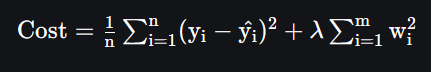 where: 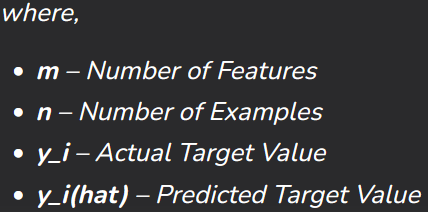
- Lasso Regression :
 Least Absolute Shrinkage and Selection Operator regression (L1 Regularization) adds absolute value of magnitude of coefficient as a penalty to the loss function. this helps to find important features by penalizing weights equal to zero if the feature isn't important to the model. the equation for cost function will be: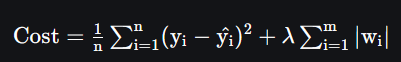 where: 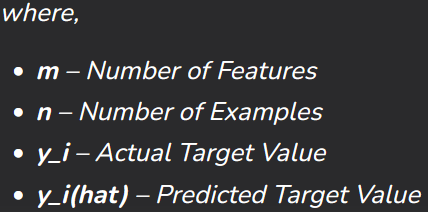

#### 3. Calculate output k-fold Cross-Validationfor dataset = [[10], [9], [8], [7], [6], [5], [4], [3], [2], [1]]

In [102]:
from sklearn.model_selection import KFold
data=np.array([[10], [9], [8], [7], [6], [5], [4], [3], [2], [1]])

#np.random.shuffle(data)
kf=KFold(n_splits=5)
i=1
for train_index,test_index in kf.split(data):
    print(f'fold {i} Train set: {data[train_index].T}, Test set: {data[test_index].T}')
    i+=1

fold 1 Train set: [[8 7 6 5 4 3 2 1]], Test set: [[10  9]]
fold 2 Train set: [[10  9  6  5  4  3  2  1]], Test set: [[8 7]]
fold 3 Train set: [[10  9  8  7  4  3  2  1]], Test set: [[6 5]]
fold 4 Train set: [[10  9  8  7  6  5  2  1]], Test set: [[4 3]]
fold 5 Train set: [[10  9  8  7  6  5  4  3]], Test set: [[2 1]]
